Life Cycle of DataScience Project

1.Business Undestanding (Project Planning according to client requirement).
2.Data Collection  (different sources in different format or sometime client provide data)
3.Data Preparation (Cleaning, transform, remove duplicate, Normalization, F.E, EDA, much more..) 
4.Data Analysis( Bar, Charts, Maps)
5.Model Building (Supervised, UnSupervised used according to data)
6.Model Evaluation (MSE, RMSE, MAE, RSquare, Adj RSquare) 
7.Model Deployment(AWS, Azure)
8.Monitor(specific interval of time)

Assumptions for Linear Regression

1.Linearity: Relationship between X and mean of Y should be linear.

2.NoMulticolinearity: Two or more independent Variable should not be strongly corelate with each other.

3.Normality: Data has to be Normally distributed.

4.Data should be distributed along a straight line.



BLACK FRIDAY SALES ANALYSIS

Aim:- To predict the purchase amount of product.

In [3]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("train_bf.csv")

In [5]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [6]:
df.sample(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
27108,1004133,P0095142,M,46-50,4,C,2,0,2,4.0,NaN,12863
154797,1005916,P00179342,M,51-55,20,B,1,1,11,NaN,NaN,4676
101495,1003691,P00146042,M,26-35,7,B,1,1,1,13.0,15.0,11794
363778,1001960,P00051442,M,46-50,7,B,3,1,8,17.0,NaN,9709
239708,1001010,P00161242,M,26-35,0,A,1,0,1,5.0,12.0,3905
269264,1005505,P00058242,F,26-35,4,B,3,1,3,4.0,12.0,13361
548704,1004099,P00371644,M,36-45,17,C,0,0,20,NaN,NaN,487
183035,1004240,P00101042,M,36-45,17,C,3,0,5,12.0,NaN,5303
337773,1003988,P00319342,F,26-35,14,B,4+,0,5,8.0,NaN,6979
69056,1004543,P00042242,M,26-35,2,A,0,0,5,15.0,NaN,3753


In [7]:
# information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
# decsribing the data

df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
# checking the datatypes of attributes of dataset

df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [10]:
# checking if there is any NULL values present in the dataset

df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [11]:
df['Gender'].value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

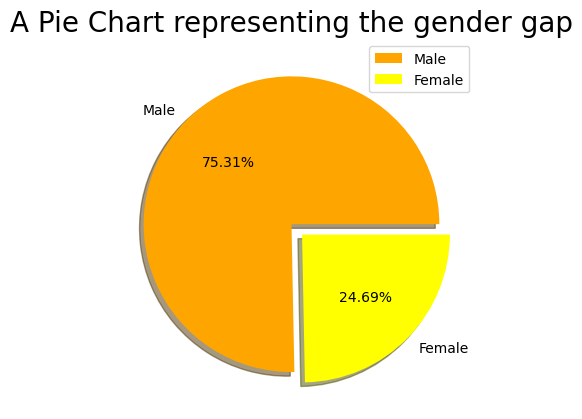

In [12]:
# pie chart 

size = [414259, 135809]
labels = ['Male', 'Female']
colors = ['orange', 'yellow']
explode = [0, 0.1]

plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 20)
plt.legend()
plt.show()

In [13]:
# finding the maximum purchase in both male and female

df.groupby(df.Gender).Purchase.max()

Gender
F    23959
M    23961
Name: Purchase, dtype: int64

In [14]:
# finding the minimum purchase in both male and female

df.groupby(df.Gender).Purchase.min()

Gender
F    12
M    12
Name: Purchase, dtype: int64

In [15]:
# checking dependency of gender on purchase

df[['Gender', 'Purchase']].groupby('Gender').mean()

,Purchase
Gender,
F,8734.565765
M,9437.526040


C:\Users\niksh\AppData\Local\Temp\ipykernel_36912\3473429548.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Age'], palette = 'pastel')


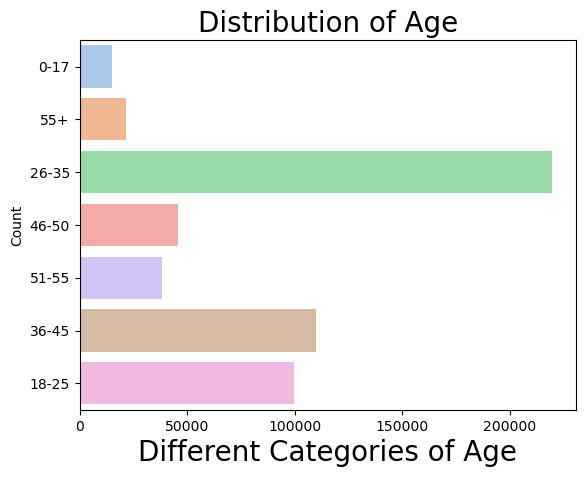

In [16]:
# visualizing age of customers

sns.countplot(df['Age'], palette = 'pastel')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Different Categories of Age', fontsize = 20)
plt.ylabel('Count')
plt.show()

In [17]:
# checing the dependency of age attribute with purchasing power

df[['Age', 'Purchase']].groupby('Age').mean()

,Purchase
Age,
0-17,8933.464640
18-25,9169.663606
26-35,9252.690633
36-45,9331.350695
46-50,9208.625697
51-55,9534.808031
55+,9336.280459


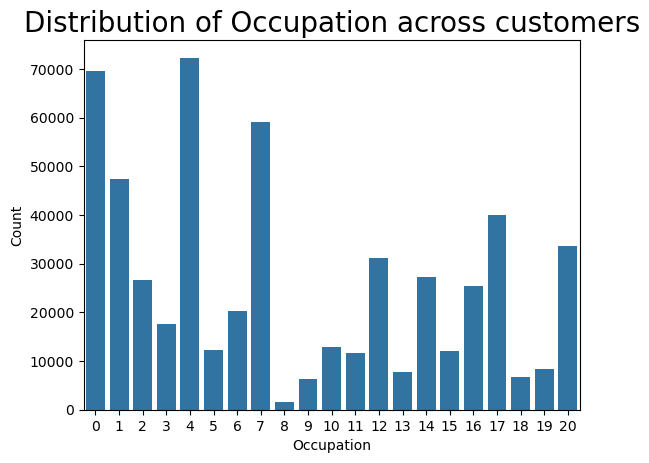

In [18]:
# visualizing the occupation of customers

sns.countplot(x='Occupation', data=df)
plt.title('Distribution of Occupation across customers', fontsize = 20)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()


C:\Users\niksh\AppData\Local\Temp\ipykernel_36912\4272285625.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['City_Category'], palette = 'colorblind')


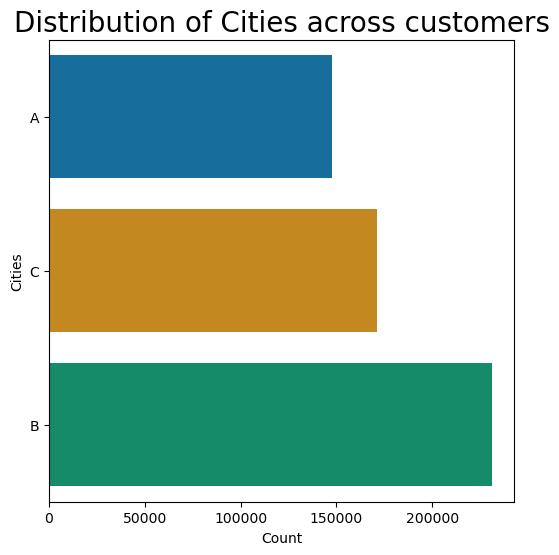

In [46]:
# visulaizing the cities the customers are from

sns.countplot(df['City_Category'], palette = 'colorblind')
plt.title('Distribution of Cities across customers', fontsize = 20)
plt.ylabel('Cities')
plt.xlabel('Count')
plt.show()

In [20]:
# checking the dependency of cities where custoer live with the purchasing power

df[['City_Category', 'Purchase']].groupby('City_Category').mean()

,Purchase
City_Category,
A,8911.939216
B,9151.300563
C,9719.920993


In [21]:
# we need to label the 4+ to 5 to visualize the stay of customers in a city
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].map({'0': 0, '1': 1, '2': 2, '3': 3, '4+': 4,})

df['Stay_In_Current_City_Years'].value_counts()

Stay_In_Current_City_Years
1    193821
2    101838
3     95285
4     84726
0     74398
Name: count, dtype: int64

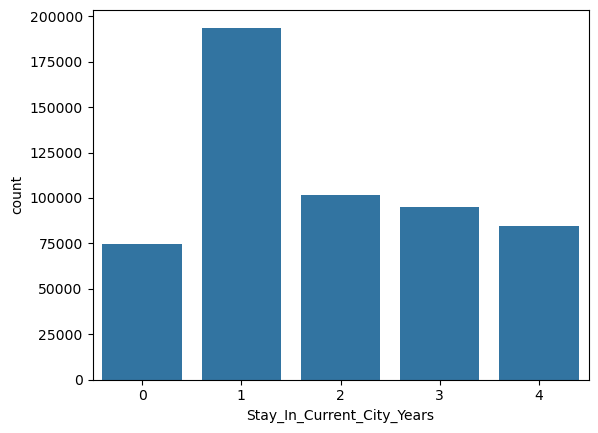

In [22]:
# visualizing the stay in current years


sns.countplot(x = 'Stay_In_Current_City_Years', data=df)
plt.show()

In [23]:
# checking the dependency of stay in purchasing power

df[['Stay_In_Current_City_Years', 'Purchase']].groupby('Stay_In_Current_City_Years').mean()

,Purchase
Stay_In_Current_City_Years,
0,9180.075123
1,9250.145923
2,9320.429810
3,9286.904119
4,9275.598872


In [24]:
# visualizing the Marital Status

df['Marital_Status'].value_counts()

Marital_Status
0    324731
1    225337
Name: count, dtype: int64

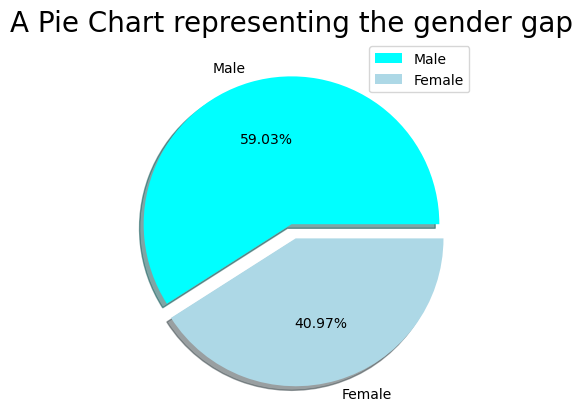

In [25]:
# pie chart 

size = [324731, 225337]
labels = ['Male', 'Female']
colors = ['cyan', 'lightblue']
explode = [0, 0.1]

plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 20)
plt.legend()
plt.show()

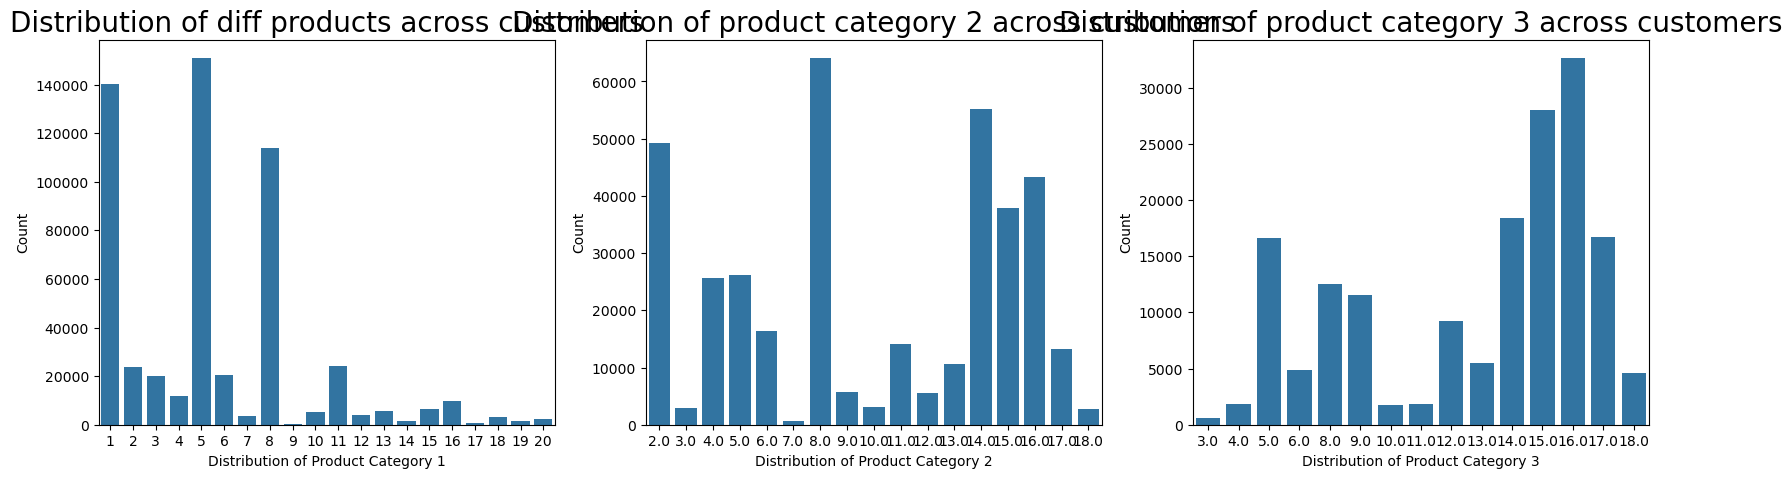

In [47]:
# visualizing the product category 1, product category 2, product category 3

plt.rcParams['figure.figsize'] = (20, 5)

plt.subplot(131)
sns.countplot(x='Product_Category_1', data=df)
plt.title('Distribution of diff products across customers', fontsize = 20)
plt.xlabel('Distribution of Product Category 1')
plt.ylabel('Count')

plt.subplot(132)
sns.countplot(x='Product_Category_2', data=df)
plt.title('Distribution of product category 2 across customers', fontsize = 20)
plt.xlabel('Distribution of Product Category 2')
plt.ylabel('Count')

plt.subplot(133)
sns.countplot(x='Product_Category_3', data=df)
plt.title('Distribution of product category 3 across customers', fontsize = 20)
plt.xlabel('Distribution of Product Category 3')
plt.ylabel('Count')


plt.show()

In [28]:
# checking the dependency of product 1 on purchasing power

df[['Product_Category_1', 'Purchase']].groupby('Product_Category_1').mean()

,Purchase
Product_Category_1,
1,13606.218596
2,11251.935384
3,10096.705734
4,2329.659491
5,6240.088178
6,15838.478550
7,16365.689600
8,7498.958078
9,15537.375610


In [29]:
# checking the dependency of product 1 on purchasing power

df[['Product_Category_2', 'Purchase']].groupby('Product_Category_2').mean()

,Purchase
Product_Category_2,
2.0,13619.356401
3.0,11235.359570
4.0,10215.192001
5.0,9027.821574
6.0,11503.551379
7.0,6884.683706
8.0,10273.259518
9.0,7277.006851
10.0,15648.729543


In [30]:
# checking the dependency of product 1 on purchasing power

df[['Product_Category_3', 'Purchase']].groupby('Product_Category_3').mean()

,Purchase
Product_Category_3,
3.0,13939.696574
4.0,9794.386667
5.0,12117.786889
6.0,13194.311043
8.0,13024.918882
9.0,10431.697210
10.0,13505.813441
11.0,12091.437673
12.0,8715.512762


C:\Users\niksh\AppData\Local\Temp\ipykernel_36912\4249549659.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Purchase'], color = 'purple', fit = norm)


The mu 9263.968712959126 and Sigma 5023.060827959928 for the curve


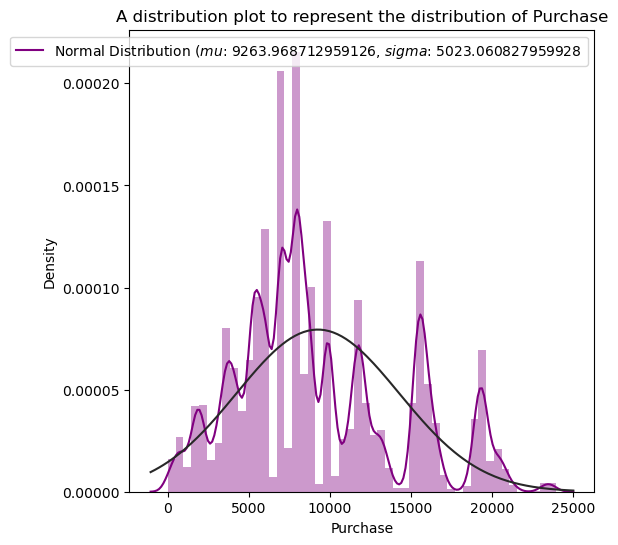

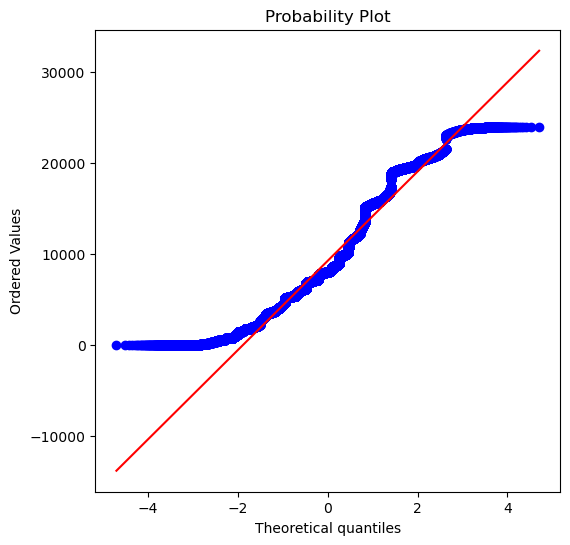

In [31]:
# visualizing the purchase attribute which is our target variable

# importing important libraries
from scipy import stats
from scipy.stats import norm

# plotting a distribution plot for the target variable
plt.rcParams['figure.figsize'] = (6,6)
sns.distplot(df['Purchase'], color = 'purple', fit = norm)

# fitting the target variable to the normal curve 
mu, sigma = norm.fit(df['Purchase']) 
print("The mu {} and Sigma {} for the curve".format(mu, sigma))

plt.title('A distribution plot to represent the distribution of Purchase')
plt.legend(['Normal Distribution ($mu$: {}, $sigma$: {}'.format(mu, sigma)], loc = 'best')
plt.show()

# plotting the QQplot
stats.probplot(df['Purchase'], plot = plt)
plt.show()

In [32]:
# looking at the columns of the dataset

df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [33]:
# removing unwanted columns

# saving the attributes User_ID and Product_ID before deleting them
User_ID = df['User_ID']
Product_ID = df['Product_ID']

data = df.drop(['User_ID', 'Product_ID'], axis = 1)

# checking the new shape of data
data.shape

(550068, 10)

In [34]:
# filling the missing values

#data['Product_Category_2'].fillna(0, inplace = True)
#data['Product_Category_3'].fillna(0, inplace = True)
data.fillna({'Product_Category_2':0},inplace=True)
data.fillna({'Product_Category_3':0},inplace=True)
data.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [35]:
# making dummies of variables
# performing one hot encoding


data= pd.get_dummies(data)

# checking the shape of new dataset
data.shape

(550068, 19)

In [36]:
data.head()

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C
0,10,2,0,3,0.0,0.0,8370,True,False,True,False,False,False,False,False,False,True,False,False
1,10,2,0,1,6.0,14.0,15200,True,False,True,False,False,False,False,False,False,True,False,False
2,10,2,0,12,0.0,0.0,1422,True,False,True,False,False,False,False,False,False,True,False,False
3,10,2,0,12,14.0,0.0,1057,True,False,True,False,False,False,False,False,False,True,False,False
4,16,4,0,8,0.0,0.0,7969,False,True,False,False,False,False,False,False,True,False,False,True


In [37]:
# splitting the data into dependent and independents sets

y = data['Purchase']

# now removing the purchase column from the dataset
data = data.drop(['Purchase'], axis = 1)

x = data

# checking the shapes of x and y
print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)

Shape of x:  (550068, 18)
Shape of y:  (550068,)


In [38]:
# splitting into training and testing

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (385047, 18)
Shape of x_test:  (165021, 18)
Shape of y_train:  (385047,)
Shape of y_test:  (165021,)


In [39]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Modelling

In [40]:
# predictive analytics
# regression analysis
# Linear Regression

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *
model = Ridge()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)
print(x_train)

RMSE Error: 4632.125289994404
R2 Score: 0.15364329307650648
[[-0.77793593  0.11030949 -0.83404423 ... -0.60608567  1.17335416
  -0.67123008]
 [-0.62454276  0.88601152 -0.83404423 ... -0.60608567 -0.8522576
   1.48980212]
 [-0.47114958  0.11030949 -0.83404423 ...  1.64993177 -0.8522576
  -0.67123008]
 ...
 [ 0.90938899 -1.44109455  1.19897719 ... -0.60608567  1.17335416
  -0.67123008]
 [-1.23811546  0.11030949 -0.83404423 ... -0.60608567 -0.8522576
   1.48980212]
 [ 1.06278217  0.11030949 -0.83404423 ...  1.64993177 -0.8522576
  -0.67123008]]


In [41]:
# predictive analytics
# regression analysis
# Linear Regression

from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

model = ElasticNet()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 4663.080544204063
R2 Score: 0.14229354476512635


In [42]:
# predictive analytics
# regression analysis
# Linear Regression

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

model = Lasso()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 4632.1360205001565
R2 Score: 0.15363937183281684


In [43]:
# predictive analytics
# regression analysis
# Linear Regression

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

model = GradientBoostingRegressor(n_estimators = 100, max_depth = 5, min_samples_split = 2, learning_rate = 0.1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 2925.10308824043
R2 Score: 0.6624988962921545
